In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

for language in os.listdir('./Books'):
    print(language)
    for author in os.listdir('./Books' + '/' + language):
        for title in os.listdir('./Books' + '/' + language + '/' + author):
            inputfile = './Books' + '/' + language + '/' + author + '/' + title
            books = read_book(inputfile)
            print(inputfile)
        

Portuguese
./Books/Portuguese/shakespeare/Hamlet.txt
./Books/Portuguese/dinis/Os fidalgos da Casa Mourisca.txt
./Books/Portuguese/dinis/A Morgadinha dos Cannaviaes.txt
./Books/Portuguese/dinis/Uma fam°lia ingleza.txt
./Books/Portuguese/Queir¢s/A Rel°quia.txt
./Books/Portuguese/Queir¢s/A Illustre Casa de Ramires.txt
./Books/Portuguese/Queir¢s/O Primo Bazilio.txt
./Books/Portuguese/Queir¢s/O crime do padre Amaro.txt
./Books/Portuguese/Queir¢s/A correspondància de Fradique Mendes.txt
./Books/Portuguese/Queir¢s/Cartas de Inglaterra.txt
./Books/Portuguese/Queir¢s/Os Maias.txt
./Books/Portuguese/Queir¢s/A Cidade e as Serras.txt
./Books/Portuguese/Queir¢s/O Mandarim.txt
./Books/Portuguese/branco/Carlota Angela.txt
./Books/Portuguese/branco/Estrellas Funestas.txt
./Books/Portuguese/branco/Livro de Consolação.txt
./Books/Portuguese/branco/A Neta do Arcediago.txt
./Books/Portuguese/branco/Agulha em Palheiro.txt
./Books/Portuguese/branco/Estrellas Prop°cias.txt
./Books/Portuguese/branco/Amor d

- Let's count the total number of words of each book, and check the relation between the number of unique words per book lenght stratified by language on a logarithmic scale.

In [3]:
text_test = "text to test the function. Lets test"

def count_words(text):
    text = text.lower()
    skips = [".", ",",";",":","'",'"']
    word_counts = {}
    for ch in skips:
        text = text.replace(ch,"")
    for word in text.split(" "):
        # knowm word
        if word in word_counts:
            word_counts[word] += 1
        else:
            # unknown word
            word_counts[word] = 1
    return word_counts

count_words(text_test)

{'text': 1, 'to': 1, 'test': 2, 'the': 1, 'function': 1, 'lets': 1}

In [4]:
def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [5]:
books_dir = './Books'
import pandas as pd

table = pd.DataFrame(columns = ("language","author", "title", "length", "unique"))
rowing = 1

for language in os.listdir(books_dir):
    for author in os.listdir(books_dir + '/' + language):
        for title in os.listdir(books_dir + '/' + language + '/' + author):
            inputfile = books_dir + '/' + language + '/' + author + '/' + title
            books = read_book(inputfile)
            (unique_words,counts) = word_stats(count_words(books))
            table.loc[rowing] = language, author.capitalize(), title.replace(".txt","") , sum(counts), unique_words
            rowing += 1


In [6]:
table.head()

,language,author,title,length,unique
1,Portuguese,Shakespeare,Hamlet,30567,9700
2,Portuguese,Dinis,Os fidalgos da Casa Mourisca,130834,27834
3,Portuguese,Dinis,A Morgadinha dos Cannaviaes,134382,30728
4,Portuguese,Dinis,Uma fam°lia ingleza,109270,26786
5,Portuguese,Queir¢s,A Rel°quia,77627,21399


In [7]:
table[table.language == "English"]

,language,author,title,length,unique
62,English,Shakespeare,The Merchant of Venice,20949,4978
63,English,Shakespeare,Richard III,48315,5449
64,English,Shakespeare,Othello,26590,5898
65,English,Shakespeare,Romeo and Juliet,40776,5118
66,English,Shakespeare,Macbeth,16874,4780
67,English,Shakespeare,A Midsummer Night's Dream,16103,4345
68,English,Shakespeare,Hamlet,28551,6776


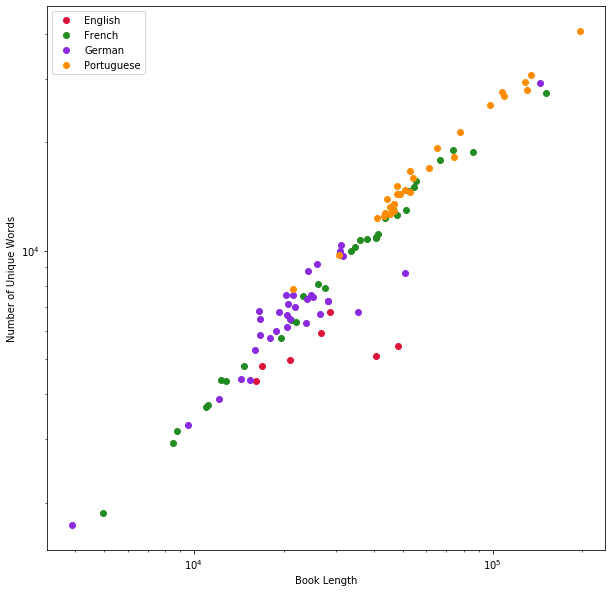

In [8]:
plt.figure(figsize = (10,10))
subset = table[table.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color="crimson")
subset = table[table.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color="forestgreen")
subset = table[table.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color="blueviolet")
subset = table[table.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color="darkorange")
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words");
plt.savefig("Langsstats.pdf")

We can see that Portuguese language has predominantly longer books in terms of words number and number of unique words as well.

<!--....-->



- Now let's inspect only Hamlet for every single translation. We will calculate the mean word lenght per translation and define a stat 'frequency' for each word defined as follows:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [9]:
hamlets = pd.read_csv("hamlet.csv", index_col=0)
hamlets.head()

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


First let's see one way to do it, with the English translation.

In [10]:
language, text = hamlets.iloc[0]
counted_text = count_words(text)

data = pd.DataFrame.from_dict(counted_text, orient = 'index',columns = ['number']).reset_index()
data = data.rename(columns={"index": "word", "number": "count"})
data.head()

,word,count
0,the,925
1,tragedie,2
2,of,568
3,hamlet\n,39
4,,45442


In [11]:
def freq(word):
    if word > 10:
        return 'frequent'
    elif word > 1 & word <= 10:
        return 'infrequent'
    elif word == 1:
        return 'unique'

In [12]:
data = pd.DataFrame(data, columns = ['word','count','lenght','frequency'])
data['lenght'] = data.apply(lambda i: len(i['word']), axis=1,result_type='broadcast')
data['frequency'] = data.apply(lambda i: freq(i['count']), axis=1, result_type='broadcast')
data.head()

,word,count,lenght,frequency
0,the,925,3,frequent
1,tragedie,2,8,infrequent
2,of,568,2,frequent
3,hamlet\n,39,7,frequent
4,,45442,0,frequent


In [13]:
len_freq = []
len_infreq = []
len_unique = []
for i in data.index:
    if data['frequency'][i] == 'frequent':
        len_freq += [data['lenght'][i]]
    if data['frequency'][i] == 'infrequent':
        len_infreq += [data['lenght'][i]]
    if data['frequency'][i] == 'unique':
        len_unique += [data['lenght'][i]]
        
mean_len_freq = sum(len_freq)/len(len_freq)
mean_len_infreq = sum(len_infreq)/len(len_infreq)
mean_len_unique = sum(len_unique)/len(len_unique)

In [14]:
Data = {'language':[language,language,language], 
        'frequency':["frequent","infrequent","unique"],
        'mean_word_lenght':[mean_len_freq,mean_len_infreq,mean_len_unique],
        'num_words':[len(len_freq),len(len_infreq),len(len_unique)] }


In [15]:
subdata = pd.DataFrame(Data)
subdata

,language,frequency,mean_word_lenght,num_words
0,English,frequent,4.258900,309
1,English,infrequent,5.888547,1624
2,English,unique,7.166382,4105


<!--...-->

Now let's see a different way to do it and joining all the data summaries for text Hamlet translation.

In [16]:
def summarize_text(language, text):
    counted_text = count_words(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)

In [17]:
hamlets = pd.read_csv("hamlet.csv", index_col=0)
hamlets.head()

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


In [18]:
grouped_data = pd.DataFrame(columns = ["language", "frequency", "mean_word_length", "num_words"])

for loop in range (hamlets.shape[0]): 
    language, text = hamlets.iloc[loop]
    sub_data = summarize_text(language, text)
    grouped_data = grouped_data.append(sub_data)
   

In [19]:
grouped_data

,language,frequency,mean_word_length,num_words
frequent,English,frequent,4.258900,309
infrequent,English,infrequent,5.888547,1624
unique,English,unique,7.166382,4105
frequent,German,frequent,4.578595,299
infrequent,German,infrequent,6.383362,1719
unique,German,unique,9.224455,6420
frequent,Portuguese,frequent,4.418327,251
infrequent,Portuguese,infrequent,6.461814,1676
unique,Portuguese,unique,8.857524,6380


Finally, let's plot the word statistics of each translation and check the differences.

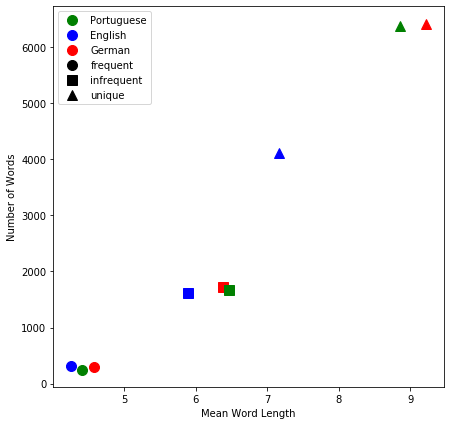

In [22]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
plt.savefig("hamletstats.png")
plt.plot;

#### Observations:
- The German translation has generally longer words regardlessly of category
- The English translation has generally smaller words
- Unique words of the English translation are considerably smaller than the Portuguese and German translation
- Portuguese and German translations possess similar statistics